In [1]:
#import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

## Dataset: beer_foam.csv

Source: J.J. Hackbarth (2006). "Multivariate Analyses of Beer Foam Stand,"
Journal of the Institute of Brewing, Vol. 112, #1, pp. 17-24

Description: Measurements of wet foam height and beer height at various
time points for Shiner Bock at 20C. Author fits exponential decay model:
H(t) = H(0)*exp(-lambda*t)

Variables/Columns
TIME: Time from pour (seconds)  4-8
FOAM: Wet foam height (cm)  10-16
BEER: Beer height (cm)    18-24

**Hypothesis**: Can we predict the time from pour using the measurements of foam height and beer height?


In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('merged.csv')
df

,suicide_country,suicide_year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),GINI index (World Bank estimate).1,average 2000-15
0,Albania,2007,male,75+ years,8,42366,18.88,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
1,Albania,2007,male,35-54 years,29,378626,7.66,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
2,Albania,2007,male,55-74 years,14,224160,6.25,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
3,Albania,2007,female,75+ years,3,57404,5.23,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
4,Albania,2007,male,25-34 years,9,172494,5.22,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
5,Albania,2007,female,15-24 years,13,281080,4.63,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
6,Albania,2007,male,15-24 years,13,288349,4.51,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
7,Albania,2007,female,25-34 years,8,183629,4.36,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
8,Albania,2007,female,55-74 years,9,221120,4.07,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN
9,Albania,2007,female,35-54 years,14,391811,3.57,Albania2007,NaN,10701011897,...,0.552678,0.246335,0.300681,-0.045108,-0.420024,1.764947,0.380848,NaN,0.30325,NaN


In [3]:
#get column names
df["Life Ladder"]

0       4.634252
1       4.634252
2       4.634252
3       4.634252
4       4.634252
5       4.634252
6       4.634252
7       4.634252
8       4.634252
9       4.634252
10      4.634252
11      4.634252
12      5.485470
13      5.485470
14      5.485470
15      5.485470
16      5.485470
17      5.485470
18      5.485470
19      5.485470
20      5.485470
21      5.485470
22      5.485470
23      5.485470
24      5.268937
25      5.268937
26      5.268937
27      5.268937
28      5.268937
29      5.268937
          ...   
7262    5.537178
7263    5.537178
7264    5.537178
7265    5.537178
7266    5.537178
7267    5.537178
7268    6.036977
7269    6.036977
7270    6.036977
7271    6.036977
7272    6.036977
7273    6.036977
7274    6.036977
7275    6.036977
7276    6.036977
7277    6.036977
7278    6.036977
7279    6.036977
7280    5.995539
7281    5.995539
7282    5.995539
7283    5.995539
7284    5.995539
7285    5.995539
7286    5.995539
7287    5.995539
7288    5.995539
7289    5.9955

In [4]:
df_test = df.loc[(df["suicide_country"] == "Canada") | (df["suicide_country"] == "Mexico") | (df["suicide_country"] == "United States")]
df_test

,suicide_country,suicide_year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),...,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),GINI index (World Bank estimate).1,average 2000-15
1004,Canada,2005,male,35-54 years,1341,5018957,26.72,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1005,Canada,2005,male,75+ years,165,772032,21.37,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1006,Canada,2005,male,55-74 years,539,2802901,19.23,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1007,Canada,2005,male,25-34 years,415,2236320,18.56,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1008,Canada,2005,male,15-24 years,378,2249377,16.80,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1009,Canada,2005,female,35-54 years,418,5018764,8.33,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1010,Canada,2005,female,15-24 years,131,2144094,6.11,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1011,Canada,2005,female,55-74 years,158,2961910,5.33,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1012,Canada,2005,female,75+ years,58,1211769,4.79,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN
1013,Canada,2005,female,25-34 years,96,2188897,4.39,Canada2005,0.892,1.17E+12,...,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,NaN,0.3368,NaN


In [5]:
#drop columns with no data - for some reason I'm getting an error now that things are cleaned out. 
df_test.drop(columns=['country-year', 'HDI for year', 'GINI index (World Bank estimate)', 'average 2000-15'], inplace=True)

C:\Users\Leon\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
#drop all NaNs
clean_df = df_test.dropna()
clean_df

,suicide_country,suicide_year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),Generation,...,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate).1
1004,Canada,2005,male,35-54 years,1341,5018957,26.72,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1005,Canada,2005,male,75+ years,165,772032,21.37,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1006,Canada,2005,male,55-74 years,539,2802901,19.23,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1007,Canada,2005,male,25-34 years,415,2236320,18.56,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1008,Canada,2005,male,15-24 years,378,2249377,16.80,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1009,Canada,2005,female,35-54 years,418,5018764,8.33,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1010,Canada,2005,female,15-24 years,131,2144094,6.11,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1011,Canada,2005,female,55-74 years,158,2961910,5.33,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1012,Canada,2005,female,75+ years,58,1211769,4.79,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368
1013,Canada,2005,female,25-34 years,96,2188897,4.39,1.17E+12,38218,Boomers,...,0.238196,0.502681,0.838544,0.233278,0.442818,1.168249,1.748819,1.636804,0.220652,0.3368


In [7]:
#new df with all the NaNs removed - but it looks like we may have lost some countries? 
clean_df.describe()

,suicide_year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),WHR2018Chapter2OnlineData_year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,...,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate).1
count,288.000000,288.000000,2.880000e+02,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,2010.791667,1369.319444,1.223766e+07,9.690521,36655.083333,2010.791667,7.133023,10.340099,0.889259,69.179666,...,0.100695,0.618819,0.833886,0.240863,0.423561,0.519479,0.976298,1.969271,0.277748,0.415615
std,2.569928,2396.247225,1.101122e+07,9.311158,20702.685508,2.569928,0.347514,0.517696,0.063103,1.709216,...,0.168288,0.129729,0.034484,0.024146,0.092403,0.669389,0.844457,0.211343,0.040096,0.060355
min,2005.000000,6.000000,7.720320e+05,0.340000,8651.000000,2005.000000,6.236287,9.616589,0.759138,66.638939,...,-0.170896,0.369588,0.744821,0.196071,0.256193,-0.437032,-0.161395,1.612508,0.215351,0.336800
25%,2009.000000,136.750000,2.433153e+06,1.747500,10977.750000,2009.000000,6.898123,9.700287,0.874301,67.423775,...,-0.099326,0.493411,0.813850,0.227373,0.358271,-0.274197,-0.068126,1.777127,0.242992,0.336800
50%,2011.000000,397.500000,1.009897e+07,6.645000,49507.500000,2011.000000,7.160824,10.624494,0.907682,69.638008,...,0.201543,0.679039,0.837452,0.235233,0.404562,0.842964,1.442016,2.031626,0.282863,0.406800
75%,2013.000000,1245.750000,2.025084e+07,14.977500,54923.250000,2013.000000,7.420050,10.809260,0.936856,70.589233,...,0.238396,0.703694,0.857688,0.260662,0.503779,1.150405,1.759792,2.146182,0.309134,0.484750
max,2015.000000,11767.000000,4.300247e+07,38.850000,60387.000000,2015.000000,7.650346,10.876660,0.961552,71.799850,...,0.301623,0.784898,0.890220,0.281265,0.608264,1.275261,1.838644,2.328691,0.344316,0.484750


In [8]:
# #test to see if I'm getting nay more NaNs - comes up false
# np.isnan(clean_df.any()) 

In [9]:
# Function to count and check values - 
#borrowed from https://www.kaggle.com/marcellosusanto/simple-analysis-on-suicide-rates-overview/data

def check_missing_values(df) :
    n = len(df)
    var = list(df.columns)
    missing_var = []
    missing_count = []
    print('Variable with missing values :')
    
    for i in var :
        count = np.sum(df[i].isna())
        count_percentage = round(count*100/n, 2)
        if count > 0 :
            print(i,':',count,'//',count_percentage,'%')
            missing_var.append(i)
            missing_count.append(count_percentage)
    
    return missing_var, missing_count

In [10]:
check_missing_values(clean_df)

Variable with missing values :


([], [])

In [11]:
# Assign the data to X and y - go by GINI 
# "GINI index (World Bank estimate).1"

X = clean_df[["gdp_per_capita ($)"]]
# y = df["suicide_year"].values.reshape(-1, 1)
y = clean_df["suicides/100k pop"].values.reshape(-1, 1)

print(X.shape, y.shape)

(288, 1) (288, 1)


In [12]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION


In [16]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
from regressors import stats
import statsmodels.api as sm
model = LinearRegression()
### END SOLUTION

In [19]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
opt = model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
test_r2_score = r2_score(X_test, y_test)
### END SOLUTION 

x2 = sm.add_constant(X_test)
est = sm.OLS(y_test,x2)
est2 = est.fit()


print(f"coef_pval:\n", stats.coef_pval(model,X_test,y_test))
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print(est2.summary())

# Why low p-value has low regression 

coef_pval:
 [7.71772255e-02 1.07879143e-08]
Training Score: 0.1235823626606658
Testing Score: 0.16653793885247903
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     16.74
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           0.000113
Time:                        20:53:09   Log-Likelihood:                -255.15
No. Observations:                  72   AIC:                             514.3
Df Residuals:                      70   BIC:                             518.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------

Text(0.5,1,'Residual Plot')

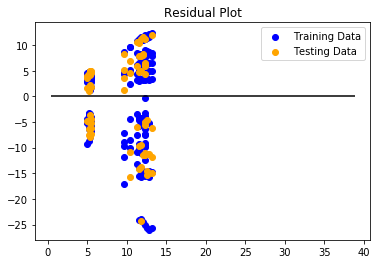

In [22]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [ ]:
#not a great score - .051
model.score(X_test, y_test)